**Predicting Heart Disease in Patients Using Classification

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
urlfile= "https://raw.githubusercontent.com/cocom250/DSCI-100-Group-17/main/heart_disease_uci.csv"
heart_disease_data <- read_csv(url(urlfile))
head(heart_disease_data)

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0


In [3]:
heart_disease_data <- rename(heart_disease_data, 
                             region = dataset,
                             pain_type = cp,
                             resting_bps = trestbps,
                             fasting_bs = fbs,
                             resting_ecg = restecg,
                             max_hr = thalch,
                             n_major_vessel = ca,
                             severity = num) 
heart_disease_data

id,age,sex,region,pain_type,resting_bps,chol,fasting_bs,resting_ecg,max_hr,exang,oldpeak,slope,n_major_vessel,thal,severity
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0
7,62,Female,Cleveland,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,2,normal,3
8,57,Female,Cleveland,asymptomatic,120,354,FALSE,normal,163,TRUE,0.6,upsloping,0,normal,0
9,63,Male,Cleveland,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,1,reversable defect,2


In [4]:
heart_disease_data <- filter(heart_disease_data, region == "Switzerland") |>
    mutate(severity = as.factor(severity)) |>
    select(severity, age, pain_type, chol, max_hr, exang, resting_ecg, sex)
heart_disease_data #cleaning up data, filtering for Switzerland and selecting predictor columns

severity,age,pain_type,chol,max_hr,exang,resting_ecg,sex
<fct>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>
1,32,typical angina,0,127,FALSE,normal,Male
1,34,asymptomatic,0,154,FALSE,NA,Male
3,35,asymptomatic,0,130,TRUE,normal,Male
1,36,asymptomatic,0,125,TRUE,normal,Male
2,38,asymptomatic,0,166,FALSE,normal,Female
1,38,asymptomatic,0,156,FALSE,normal,Female
0,38,non-anginal,0,179,FALSE,normal,Male
1,38,non-anginal,0,128,TRUE,normal,Male
2,38,asymptomatic,0,150,FALSE,normal,Male


In [9]:
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = severity)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [11]:
severity_proportion <- heart_disease_train |>
    group_by(severity) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))
severity_proportion #counting for the number of observations and proprtions of each severity level

pain_type_count <- heart_disease_train|>
    group_by(severity, pain_type) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))
pain_type_count #counting for the number of observations which each symptom in the data 

severity,n,percent
<fct>,<int>,<dbl>
0,6,6.593407
1,37,40.659341
2,23,25.274725
3,22,24.175824
4,3,3.296703


`summarise()` has grouped output by 'severity'. You can override using the
`.groups` argument.


severity,pain_type,n,percent
<fct>,<chr>,<int>,<dbl>
0,asymptomatic,2,2.197802
0,non-anginal,4,4.395604
1,asymptomatic,30,32.967033
1,atypical angina,1,1.098901
1,non-anginal,4,4.395604
1,typical angina,2,2.197802
2,asymptomatic,19,20.879121
2,non-anginal,2,2.197802
2,typical angina,2,2.197802


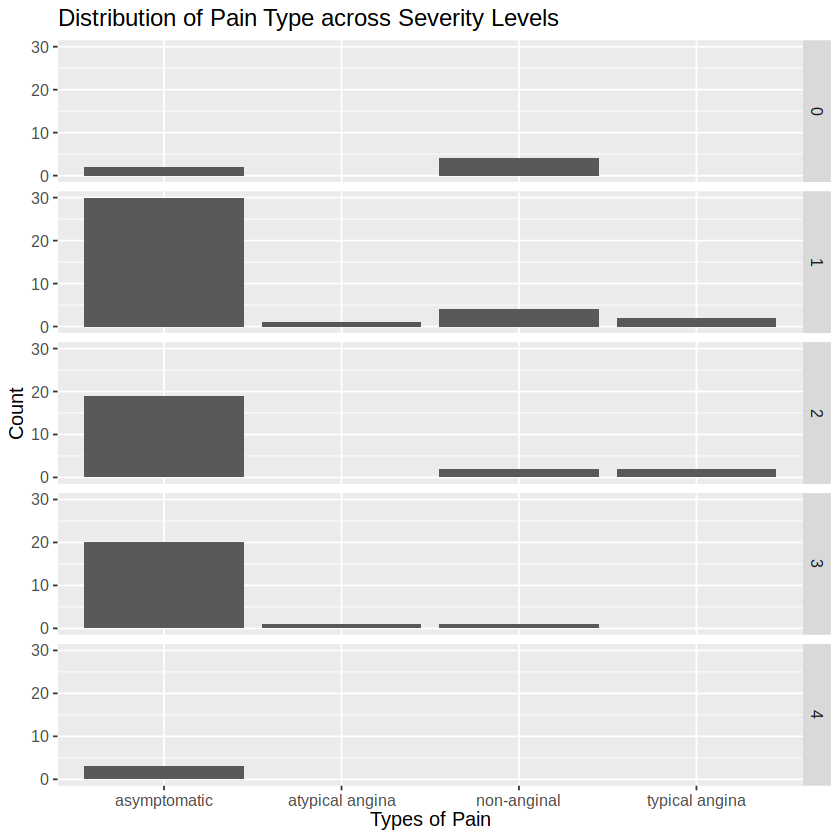

In [13]:
pain_type_distribution <- ggplot(pain_type_count, 
                                 aes(x= pain_type, y =n)) +
    geom_bar(stat ="identity") +
    labs(x = "Types of Pain", y = "Count")+
    theme(text = element_text(size =12)) +
    facet_grid(rows = vars(severity)) +
    ggtitle("Distribution of Pain Type across Severity Levels")
            
print(pain_type_distribution) #visualizing for the distribution of pain type across each severity level